1. Extract<br>
a. Features should not be strings<br>
b. Features should be of the type array/dataframe<br>
c. There should be no null values in my features and target<br>
d. Features should be in the form of rows and columns<br>

2. Split into training and testing sets<br>
e. Features should be on the same scale<br>
3. Train the model on the training set
4. Test the model on the testing set

In [2]:
import pandas as pd
df=pd.read_csv("datasets_19_420_Iris.csv",index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# 1

In [7]:
X=df.drop("Species",axis=1)

In [10]:
y=df["Species"]

In [28]:
X.shape

(150, 4)

# 2

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=21)

# 3

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn=KNeighborsClassifier(n_neighbors=5)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

# 4

In [23]:
knn.score(X_test,y_test)

0.9777777777777777

# Prediction

In [24]:
data=pd.read_csv("irisonlyfeatures.csv")

In [25]:
type(data)

pandas.core.frame.DataFrame

In [26]:
data.shape

(2, 4)

In [27]:
knn.predict(data)

array(['Iris-setosa', 'Iris-setosa'], dtype=object)

# Selecting optimal value for k

In [29]:
klist=[1,2,3,4,5,6,7,8,9,10]

In [32]:
import matplotlib.pyplot as plt

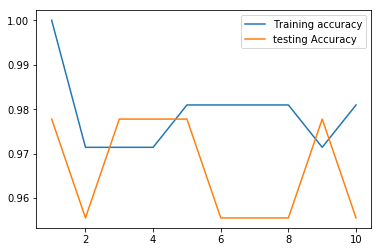

In [33]:
trainscore=[]
testscore=[]
for k in klist:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    trainscore.append(knn.score(X_train,y_train))
    testscore.append(knn.score(X_test,y_test))
plt.plot(klist,trainscore,label="Training accuracy")
plt.plot(klist,testscore,label="testing Accuracy")
plt.legend()
plt.show()